### 네이버 영화 리뷰 단어사전 만들기
- 데이터셋: Korpora에서 로딩
- 형태소 분석기: spacy
- 단어사전 설정 <-- torchtext 사용하지 말고 만들기
---
- 데이터 전처리
- tokenization
- cleaning
- vectorizing
---


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from Korpora import Korpora
import spacy
import string

from konlpy.tag import Okt

In [2]:
# load data
nsmc = Korpora.load('nsmc')


    Korpora 는 다른 분들이 연구 목적으로 공유해주신 말뭉치들을
    손쉽게 다운로드, 사용할 수 있는 기능만을 제공합니다.

    말뭉치들을 공유해 주신 분들에게 감사드리며, 각 말뭉치 별 설명과 라이센스를 공유 드립니다.
    해당 말뭉치에 대해 자세히 알고 싶으신 분은 아래의 description 을 참고,
    해당 말뭉치를 연구/상용의 목적으로 이용하실 때에는 아래의 라이센스를 참고해 주시기 바랍니다.

    # Description
    Author : e9t@github
    Repository : https://github.com/e9t/nsmc
    References : www.lucypark.kr/docs/2015-pyconkr/#39

    Naver sentiment movie corpus v1.0
    This is a movie review dataset in the Korean language.
    Reviews were scraped from Naver Movies.

    The dataset construction is based on the method noted in
    [Large movie review dataset][^1] from Maas et al., 2011.

    [^1]: http://ai.stanford.edu/~amaas/data/sentiment/

    # License
    CC0 1.0 Universal (CC0 1.0) Public Domain Dedication
    Details in https://creativecommons.org/publicdomain/zero/1.0/

[Korpora] Corpus `nsmc` is already installed at C:\Users\PC\Korpora\nsmc\ratings_train.txt
[Korpora] Corpus `nsmc` is already installed at C:\Users\PC\Kor

In [3]:
nsmc_train_df = pd.DataFrame(nsmc.train)
nsmc_test_df = pd.DataFrame(nsmc.test)

In [4]:
nsmc_train_df.head()

,text,label
0,아 더빙.. 진짜 짜증나네요 목소리,0
1,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,너무재밓었다그래서보는것을추천한다,0
3,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [5]:
nsmc_train_df.tail()

,text,label
149995,인간이 문제지.. 소는 뭔죄인가..,0
149996,평점이 너무 낮아서...,1
149997,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1
149999,한국 영화 최초로 수간하는 내용이 담긴 영화,0


In [6]:
# korean language model
KO_MODEL = 'ko_core_news_sm'

ko_nlp = spacy.load(KO_MODEL)

okt = Okt()

In [7]:
# punctuation
punct = string.punctuation

In [8]:
# delete punctuation
def delete_punct(data_df):
    for text in data_df['text']:
        for pun in punct:
            text = text.replace(pun, ' ')
        yield text

In [9]:
train_del_punct = delete_punct(nsmc_train_df)

carry = []
for text in train_del_punct:
    carry.append(text)
    
nsmc_train_df['del_punct'] = carry
nsmc_train_df

,text,label,del_punct
0,아 더빙.. 진짜 짜증나네요 목소리,0,아 더빙 진짜 짜증나네요 목소리
1,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나
2,너무재밓었다그래서보는것을추천한다,0,너무재밓었다그래서보는것을추천한다
3,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,교도소 이야기구먼 솔직히 재미는 없다 평점 조정
4,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,사이몬페그의 익살스런 연기가 돋보였던 영화 스파이더맨에서 늙어보이기만 했던 커스틴 ...
...,...,...,...
149995,인간이 문제지.. 소는 뭔죄인가..,0,인간이 문제지 소는 뭔죄인가
149996,평점이 너무 낮아서...,1,평점이 너무 낮아서
149997,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0,이게 뭐요 한국인은 거들먹거리고 필리핀 혼혈은 착하다
149998,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1,청춘 영화의 최고봉 방황과 우울했던 날들의 자화상


In [10]:
test_del_punct = delete_punct(nsmc_test_df)

carry = []
for text in test_del_punct:
    carry.append(text)

nsmc_test_df['del_punct'] = carry
nsmc_test_df

,text,label,del_punct
0,굳 ㅋ,1,굳 ㅋ
1,GDNTOPCLASSINTHECLUB,0,GDNTOPCLASSINTHECLUB
2,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0,뭐야 이 평점들은 나쁘진 않지만 10점 짜리는 더더욱 아니잖아
3,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0,지루하지는 않은데 완전 막장임 돈주고 보기에는
4,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0,3D만 아니었어도 별 다섯 개 줬을텐데 왜 3D로 나와서 제 심기를 불편하게 하죠
...,...,...,...
49995,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함
49996,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO
49997,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0,그림도 좋고 완성도도 높았지만 보는 내내 불안하게 만든다
49998,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0,절대 봐서는 안 될 영화 재미도 없고 기분만 잡치고 한 세트장에서 다 해먹네


In [11]:
# korean stopword
# 내가 지정을 해야하나...
ko_stopwords = \
    ['나', '너', '그', '저', '이', '그녀', '우리', '너희', '이것', '저것', 
     '은', '는','가', '을', '를', '에', '에서', '의', '도', '로', '와',
     '하다', '있다', '없다', '되다', '이다', '그런', '그리고', '하지만',
     '그래서', 'ㅋ', 'ㅋㅋ', 'ㅋㅋㅋ', 'ㅠ', 'ㅠㅠ', 'ㅠㅜ', 'ㅜ', 'ㅜㅜ', 
     '그러나', '또한', '매우', '너무', '아주', '더', '덜', '가장', '무적',
     '정말', '즉', '아', '어', '음', '흠', '와', '우와', '야', '냐',
     '일단', '다', '게', '거', '것', '된', '갈', '었다', '겠', '어휴',
     'OOO', '구요', '네요', '간지', '화', '놈', '조나', '산', '아이', '참',
     '영', '짜는', '만', '주', '계', '0', '1', '2', '3', '4', '5', '6',
     '8', '9', '10', 'ㅉ', 'ㅈㄱㄴ', '딱', '한', '로서는', '로서', '로써',
     '열', '무슨', '지못미', 'ㅉㅉ', 'ㄱ', 'ㄴ', 'ㄷ', 'ㄹ', 'ㅁ', 'ㅂ',
     'ㅅ', 'ㅇ', 'ㅈ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅎ', 'ㅏ', 'ㅑ', 'ㅓ', 'ㅕ', 'ㅗ',
     'ㅗㅗ', 'ㅛ', 'ㅡ', 'ㅣ', 'ㅐ', 'ㅒ', 'ㅔ', 'ㅖ', 'ㅘ', 'ㅢ', 'ㅟ',
     'ㅞ', 'ㅚ', 'ㅙ', '으', '미', '함', '라는', '보다', '하는', '이야',
     '니야', '니아', 'ㅎ', 'ㅎㅎ', 'ㅎㅎㅎ', '으로', '되는', '아닌', 
     '뿐', '불가', '처럼', '만', '없음', '싶다', '만', '걸', '으랴', '하',
     'ㅋㅋㅋㅋ', 'ㅠㅠㅠㅠㅠ', '임', '딱', '내', '뭔데', '뭔대', '또한',
     '안되', '안돼', '아까', '꽥꽥', '안', '은', '헿', '버럭', 'ㅎㅎㅎㅎ',
     '거는', '단지', '구나', '--', 'ㅡㅡ', '뭐', '이거', '쵝오', '오',
     '왜', '케', '져', '히는', '완전', '비여', '벗', '었', '으면', '해서',
     '아니', '근데', '닝', '잉', '개', '좀', '이런', '첨', '점', '대',
     '더', '줄', '하는', '하느', '내내', '거나', '중', '호렄', '앜', '엌',
     '던데', 'ㅄ', 'ㅂㅅ', 'ㅅㅂ', 'ㅈㄴ', '쌈', '다니', '였', '거라', '반',
     '그땐', '하고', 'ㅇㅅㅇ', 'ㅎㅅㅎ', 'ㅇㅂㅇ', 'ㅇㅁㅇ', 'ㅁㅇㅁㅇ', 
     '봐라', '사나', '오오', '오오오', '오오오오', '오옹', '엉', '과', '나오',
     '면서', '스러운', '이게', '게이', '못', '♥', '는데', '있나', '당한',
     '고파', '이딴', '니다', '까지', '준', '전', '나서', '전나', '겁나',
     '힛츄', '히히', '됐음', '짜잉', '이라', '이지만', '깐', '니', '지만',
     '가는', '짐', '지미', '걍', '아깝당', '맞제', '낚은', '받고', '습니다',
     '한다', '영', '엉', '에바', '바', '니바', '입니바', '아야', '에야',
     '그저', '그런', '서야', '같', '아요', '려는', '가가', '임', '낸게',
     '야서', '여서', '인가', '잤', '봄', '빈', '어느', '샌', '쌘', '척',
     '라불', '거리지', '지', '더', '우디', '드릴', '떨려', '치', '주는',
     '누는', '누느느', '만한', '그냥', '척', '스러워서', '워서','스', '러',
     '췄다', '않', '쳐', '되냐', '쪼', '끔', '하지', '거면', '이럴', '때',
     '잖', '머냐', '기', '꺼', '임', '수', '짝', '짯짝', '짝짝', '짝짝짝',
     '박박', '삑삑', '빡빡', '이젠', '역시', '♡', '으으', '된', '거진',
     '지자', '크', '크크', '크크크', '크크크크크', '킄킄', '킄', '킄크',
     '크킄', '크크킄', '크크크크', '부', '이고', '마라', '먹기', '시',
     '요', '끝', '좀', '쓔', '쑤셔', '넣', '글쎄', 'ㄷ', 'ㄷㄷ', 'ㄷㄷㄷ',
     '껒여', 'X발', '발', '콩', '마', '라', '지지', '먄', '원', '붕가', '개뿔',
     '-', '했당', '당', '했', '햇', '흐아', 'ㅋㅋㅋㅋㅋㅋㅋㅋㅋ', 'ㅋㅋㅋㅋㅋㅋㅋㅋ',
     'ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ', '하긴', '로긴', '뭥미', '자', '다', '햌ㅋㅋ',
     '핵', 'OO', '삼', '전', '쳐', '쩝', '44', '으리', 'OOOO', '～', '멍미',
     '후끈', '쓰는', '뭘', '외엔', '엔', '외', '후후', '아니여', '"', '퉤퉤',
     'ㅋㅋㅋㅋㅋㅋ', 'ㅋㅋㅋㅋㅋㅋㅋ', 'ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ', 'ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ',
     'XX', 'xx', '씨', '아오', '창', '족', '울', '쌍', '년', '레즈', '비언',
     '므냐', '역', '줘', '꼴', '또', '밖', '귤', '껍데기', '거슬', '징',
     '518', 'tv', '2011', '느니', '그닥', '버린', '꺼', '이면', '하는', '맞',
     '아서', '하나', '둘', '셋', '넷', '다섯', '여섯', '일곱', '여덟', '아홉',
     '열', '렸', '풀', '까', '非常好看', '！', '喜', '宋慧', '쵝오', '홬',
     '들', 'ㄷㄷㄷㄷ', '비됴테잎', '비짜', '펑펑', '…', 'ㅆㄹㄱ', '께요',
     '쓰', '랄','듯', '아무리', '돼', '네여', '없', '이군', '그리', '온갖',
     '가고', '적', '그렇다', '뭐야', '샜', '솄', '섔', '샛', '샸', '옘', '뜬',
     '멋', '“', '”', '일', '이', '삼', '사', '육', '칠', '팔', '구', '십', '씹',
     '있죠', '기', '니', '디', '리', '미', '비', '시', '이', '지', '치', '키',
     '티', '피', '히', '미친', '가', '나', '다', '라', '마', '바', '사', '아',
     '차', '카', '타', '파', '하', '이래', '반', '좀', '쓴', ]


In [12]:
# delete stop words
def delete_stopword(data_df):
    # for text in data_df['text']:
    #     doc = ko_nlp(text)
    #     token_list = []
    #     for token in doc:
    #         if (not token.is_stop) and (token.pos_!='SPACE'):
    #             token_list.append(token)
    #     yield token_list
    
    token_list = []
    for text in data_df['del_punct']:
        morphs = okt.morphs(text)
        carry = []
        for token in morphs:
            if (not token in ko_stopwords) and (not token.isdecimal()):
                carry.append(token)
        token_list.append(carry)
    yield token_list

In [13]:
test_del_stopword = delete_stopword(nsmc_test_df)

carry = []
for text in test_del_stopword:
    carry.append(text)

carry

[[['굳'],
  ['GDNTOPCLASSINTHECLUB'],
  ['평점', '나쁘진', '않지만', '짜', '리', '더욱', '아니잖아'],
  ['지루하지는', '않은데', '막장', '돈', '주고', '보기', '에는'],
  ['D', '아니었어도', '별', '줬을텐데', 'D', '나와서', '제', '심기', '불편하게', '하죠'],
  ['음악', '주가', '최고', '음악', '영화'],
  ['진정한', '쓰레기'],
  ['마치', '미국', '애니', '튀어나온듯', '창의력', '없는', '로봇', '디자인', '부터가', '고개', '젖게'],
  ['갈수록',
   '개판',
   '되가는',
   '중국영화',
   '유치하고',
   '내용',
   '폼',
   '잡다',
   '끝남',
   '말',
   '안되는',
   '무기',
   '유치한',
   'cg',
   '남무',
   '그립다',
   '동사서독',
   '같은',
   '영화',
   '이건',
   '류',
   '류작'],
  ['이별',
   '아픔',
   '뒤',
   '찾아오는',
   '새로운',
   '인연',
   '기쁨',
   'But',
   '모든',
   '사람',
   '그렇지는',
   '않네'],
  ['괜찮네요', '오랜', '포켓몬스터', '잼밌'],
  ['한국', '독립영화', '한계', '그렇게', '아버지', '된다와', '비교', '됨'],
  ['청춘',
   '아름답다',
   '아름다',
   '움',
   '이성',
   '흔들어',
   '놓는다',
   '찰나',
   '아름다',
   '움',
   '잘',
   '포착',
   '섬세하고',
   '아름다운',
   '수채화',
   '같은',
   '퀴어',
   '영화'],
  ['눈', '보이는', '반전', '이었지만', '영화', '흡인', '력', '사라지지', '않았다'],
  ['스토리',
   '연출',
   '연기',

In [14]:
nsmc_test_df['del_stop'] = carry[0]
nsmc_test_df

,text,label,del_punct,del_stop
0,굳 ㅋ,1,굳 ㅋ,[굳]
1,GDNTOPCLASSINTHECLUB,0,GDNTOPCLASSINTHECLUB,[GDNTOPCLASSINTHECLUB]
2,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0,뭐야 이 평점들은 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,"[평점, 나쁘진, 않지만, 짜, 리, 더욱, 아니잖아]"
3,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0,지루하지는 않은데 완전 막장임 돈주고 보기에는,"[지루하지는, 않은데, 막장, 돈, 주고, 보기, 에는]"
4,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0,3D만 아니었어도 별 다섯 개 줬을텐데 왜 3D로 나와서 제 심기를 불편하게 하죠,"[D, 아니었어도, 별, 줬을텐데, D, 나와서, 제, 심기, 불편하게, 하죠]"
...,...,...,...,...
49995,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,"[오랜, 평점, 긴, 했네, 킹왕짱, 쌈뽕, 영화, 만났습니다, 강렬하게, 육, 쾌함]"
49996,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,"[의지, 박약, 이나, 하는거다, 탈영, 주인공, 김대희, 닮았고, 이등병, 찐, 따]"
49997,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0,그림도 좋고 완성도도 높았지만 보는 내내 불안하게 만든다,"[그림, 좋고, 완성, 도도, 높았지만, 보는, 불안하게, 만든다]"
49998,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0,절대 봐서는 안 될 영화 재미도 없고 기분만 잡치고 한 세트장에서 다 해먹네,"[절대, 봐, 서는, 될, 영화, 재미, 없고, 기분, 잡, 치고, 세트, 장, 해..."


In [15]:
# token_frequency
def freq_token(data_df):
    token_freq = {}
    
    for token_list in data_df['del_stop']:
        for token in token_list:
            if token not in token_freq:
                token_freq[token] = 0
            token_freq[token] += 1
    return token_freq

In [16]:
test_freq = freq_token(nsmc_test_df)
test_freq

{'굳': 150,
 'GDNTOPCLASSINTHECLUB': 1,
 '평점': 2226,
 '나쁘진': 12,
 '않지만': 47,
 '짜': 78,
 '리': 101,
 '더욱': 94,
 '아니잖아': 27,
 '지루하지는': 4,
 '않은데': 25,
 '막장': 229,
 '돈': 698,
 '주고': 202,
 '보기': 550,
 '에는': 351,
 'D': 78,
 '아니었어도': 6,
 '별': 657,
 '줬을텐데': 2,
 '나와서': 134,
 '제': 509,
 '심기': 1,
 '불편하게': 10,
 '하죠': 8,
 '음악': 393,
 '주가': 16,
 '최고': 2014,
 '영화': 17304,
 '진정한': 108,
 '쓰레기': 1087,
 '마치': 68,
 '미국': 215,
 '애니': 292,
 '튀어나온듯': 1,
 '창의력': 2,
 '없는': 1201,
 '로봇': 36,
 '디자인': 19,
 '부터가': 28,
 '고개': 13,
 '젖게': 2,
 '갈수록': 189,
 '개판': 59,
 '되가는': 1,
 '중국영화': 28,
 '유치하고': 75,
 '내용': 1384,
 '폼': 19,
 '잡다': 2,
 '끝남': 23,
 '말': 1466,
 '안되는': 192,
 '무기': 25,
 '유치한': 59,
 'cg': 84,
 '남무': 1,
 '그립다': 26,
 '동사서독': 2,
 '같은': 854,
 '이건': 903,
 '류': 214,
 '류작': 24,
 '이별': 20,
 '아픔': 40,
 '뒤': 197,
 '찾아오는': 3,
 '새로운': 86,
 '인연': 20,
 '기쁨': 7,
 'But': 4,
 '모든': 399,
 '사람': 1643,
 '그렇지는': 3,
 '않네': 15,
 '괜찮네요': 29,
 '오랜': 263,
 '포켓몬스터': 4,
 '잼밌': 1,
 '한국': 451,
 '독립영화': 69,
 '한계': 51,
 '그렇게': 215,
 '아버지': 1

In [17]:
# 빈도별로 단어 또는 단어의 개수 저장
def cnt_token(token_dict):
    carry = {}
    for key, value in token_dict.items():
        if value not in carry:
            carry[value] = [1, [key]]
        else:
            carry[value][1].append(key)
            carry[value][0] += 1
    return carry

In [18]:
test_dict = cnt_token(test_freq)
test_dict

{150: [4, ['굳', '그나마', '인물', '시절']],
 1: [31245,
  ['GDNTOPCLASSINTHECLUB',
   '심기',
   '튀어나온듯',
   '되가는',
   '남무',
   '잼밌',
   '된다와',
   '찍고도',
   '김문옥',
   '빠져있겠지',
   '챔프',
   '해냈던',
   '헬레',
   '갈고리',
   '고어씬',
   '돋기는',
   '받을수밖에',
   '분출',
   '지저분하게',
   '늘어놓았다',
   '긁어',
   '보이던데',
   '까지면서',
   '나오려',
   '당했을',
   '뻔했으니',
   '이란시간이흘렀네요',
   '봐으면',
   'Biff',
   '왤까',
   '이율',
   '코헨',
   '하시겟지만',
   '솔직히말해',
   '채안돼갑자기',
   '깔리고',
   '풀해',
   '졌어',
   '만들겠',
   '다미앙',
   '세계보건기구',
   '들어갔다가',
   '크보',
   'ㅋㄲㅈㅁ',
   '돼야지',
   '있다나',
   '슈래기',
   '벗겨놓고',
   '터전',
   '잃을만큼',
   '보러가는게',
   '중요했을까',
   'ㅠㅜㅜㅜ',
   '돈키호테',
   '달려드는데',
   '쌩까는게',
   '퐁당',
   '빠졌다',
   '찰지구나',
   '1956년',
   '아찔한',
   '끊기는것',
   '들고다니는데',
   '사별',
   '지났다고',
   '쪼르르',
   '츠지',
   '아름답던',
   '지겨울수가',
   '펑퍼짐한',
   '건빵',
   '오도바이',
   '공겸',
   '구사해',
   '린줄',
   '용하는데',
   '들어갔겠어요',
   '잡히던',
   '짜여진듯',
   '셍',
   '협객',
   '평정하는',
   '우미관',
   '지배인',
   '유명하기도',
   '영어권',
   '되있지만',
   '참신한듯',
   '이러수를',

In [19]:
test_num = len(test_dict)
test_num

407

In [20]:
sorted(test_dict.items(), reverse=True)

[(17304, [1, ['영화']]),
 (2936, [1, ['진짜']]),
 (2226, [1, ['평점']]),
 (2197, [1, ['연기']]),
 (2014, [1, ['최고']]),
 (1884, [2, ['잘', '인']]),
 (1824, [1, ['생각']]),
 (1701, [1, ['스토리']]),
 (1647, [1, ['드라마']]),
 (1643, [1, ['사람']]),
 (1634, [1, ['감동']]),
 (1547, [1, ['보고']]),
 (1476, [1, ['고']]),
 (1466, [1, ['말']]),
 (1412, [1, ['감독']]),
 (1404, [1, ['배우']]),
 (1384, [1, ['내용']]),
 (1320, [1, ['재미']]),
 (1284, [1, ['본']]),
 (1201, [1, ['없는']]),
 (1131, [1, ['시간']]),
 (1089, [1, ['봤는데']]),
 (1087, [1, ['쓰레기']]),
 (1066, [1, ['사랑']]),
 (1046, [1, ['볼']]),
 (1029, [1, ['네']]),
 (1006, [1, ['작품']]),
 (966, [1, ['다시']]),
 (929, [1, ['할']]),
 (903, [1, ['이건']]),
 (897, [1, ['마지막']]),
 (854, [1, ['같은']]),
 (838, [1, ['정도']]),
 (836, [1, ['있는']]),
 (825, [1, ['좋은']]),
 (812, [1, ['처음']]),
 (805, [1, ['장면']]),
 (802, [1, ['주인공']]),
 (801, [1, ['입니다']]),
 (787, [1, ['이렇게']]),
 (781, [1, ['액션']]),
 (766, [1, ['최악']]),
 (753, [1, ['보는']]),
 (751, [1, ['지금']]),
 (745, [1, ['이야기']]),
 (711, [1, ['별로']]),

In [21]:
sorted_test_list = sorted(test_freq.items(), key=lambda x: x[1], reverse=True)
sorted_test_list


[('영화', 17304),
 ('진짜', 2936),
 ('평점', 2226),
 ('연기', 2197),
 ('최고', 2014),
 ('잘', 1884),
 ('인', 1884),
 ('생각', 1824),
 ('스토리', 1701),
 ('드라마', 1647),
 ('사람', 1643),
 ('감동', 1634),
 ('보고', 1547),
 ('고', 1476),
 ('말', 1466),
 ('감독', 1412),
 ('배우', 1404),
 ('내용', 1384),
 ('재미', 1320),
 ('본', 1284),
 ('없는', 1201),
 ('시간', 1131),
 ('봤는데', 1089),
 ('쓰레기', 1087),
 ('사랑', 1066),
 ('볼', 1046),
 ('네', 1029),
 ('작품', 1006),
 ('다시', 966),
 ('할', 929),
 ('이건', 903),
 ('마지막', 897),
 ('같은', 854),
 ('정도', 838),
 ('있는', 836),
 ('좋은', 825),
 ('처음', 812),
 ('장면', 805),
 ('주인공', 802),
 ('입니다', 801),
 ('이렇게', 787),
 ('액션', 781),
 ('최악', 766),
 ('보는', 753),
 ('지금', 751),
 ('이야기', 745),
 ('별로', 711),
 ('연출', 707),
 ('없고', 707),
 ('돈', 698),
 ('서', 694),
 ('느낌', 680),
 ('봐도', 676),
 ('재밌게', 660),
 ('별', 657),
 ('인데', 657),
 ('명작', 654),
 ('난', 650),
 ('많이', 648),
 ('이해', 647),
 ('라고', 636),
 ('면', 627),
 ('때문', 620),
 ('여자', 610),
 ('이영화', 608),
 ('보면', 583),
 ('부터', 571),
 ('두', 569),
 ('꼭', 561),
 ('성', 55

In [22]:
PAD_TOKEN, OOV_TOKEN = 'PAD', 'OOV'

test_vocab = {PAD_TOKEN:0, OOV_TOKEN:1}

In [27]:
for idx, tk in enumerate(sorted_test_list, 2):
    test_vocab[tk[0]] = idx

print(test_vocab)

{'PAD': 0, 'OOV': 1, '영화': 2, '진짜': 3, '평점': 4, '연기': 5, '최고': 6, '잘': 7, '인': 8, '생각': 9, '스토리': 10, '드라마': 11, '사람': 12, '감동': 13, '보고': 14, '고': 15, '말': 16, '감독': 17, '배우': 18, '내용': 19, '재미': 20, '본': 21, '없는': 22, '시간': 23, '봤는데': 24, '쓰레기': 25, '사랑': 26, '볼': 27, '네': 28, '작품': 29, '다시': 30, '할': 31, '이건': 32, '마지막': 33, '같은': 34, '정도': 35, '있는': 36, '좋은': 37, '처음': 38, '장면': 39, '주인공': 40, '입니다': 41, '이렇게': 42, '액션': 43, '최악': 44, '보는': 45, '지금': 46, '이야기': 47, '별로': 48, '연출': 49, '없고': 50, '돈': 51, '서': 52, '느낌': 53, '봐도': 54, '재밌게': 55, '별': 56, '인데': 57, '명작': 58, '난': 59, '많이': 60, '이해': 61, '라고': 62, '면': 63, '때문': 64, '여자': 65, '이영화': 66, '보면': 67, '부터': 68, '두': 69, '꼭': 70, '성': 71, '에게': 72, '인생': 73, '보기': 74, '편': 75, '이나': 76, '아깝다': 77, '짱': 78, '여': 79, '애': 80, '수준': 81, '기억': 82, '마음': 83, '같다': 84, '일': 85, '제': 86, '랑': 87, '님': 88, '결말': 89, '반전': 90, '현실': 91, '한번': 92, '하게': 93, '넘': 94, '속': 95, '매력': 96, '소재': 97, '가슴': 98, '해': 99, '없이': 100, '남자': 101, 

In [33]:
# vectorization
def encoding(data_df):
    encoding_data = []
    for token_list in data_df['del_stop']:
        sent = []
        for token in token_list:
            sent.append(test_vocab[token])
            
        encoding_data.append(sent)
    yield encoding_data

In [34]:
test_encoding = encoding(nsmc_test_df)

carry = []
for text in test_encoding:
    carry.append(text)

carry

[[[414],
  [23793],
  [4, 4479, 1354, 835, 637, 693, 2271],
  [10304, 2469, 250, 51, 289, 74, 132],
  [836, 7708, 56, 16169, 836, 460, 86, 23794, 5225, 6223],
  [115, 3557, 6, 115, 2],
  [577, 25],
  [950, 265, 184, 23795, 16170, 22, 1756, 3081, 2215, 4213, 16171],
  [316,
   1077,
   23796,
   2216,
   873,
   19,
   3082,
   16172,
   2634,
   16,
   311,
   2470,
   1078,
   773,
   23797,
   2360,
   16173,
   34,
   2,
   32,
   270,
   2547],
  [2949, 1589, 301, 12523, 762, 2950, 6871, 10305, 114, 12, 12524, 3759],
  [2152, 208, 10306, 23798],
  [102, 941, 1238, 266, 508, 23799, 399, 451],
  [973,
   1037,
   1518,
   178,
   4480,
   10307,
   16174,
   10308,
   1518,
   178,
   7,
   16175,
   5226,
   219,
   7709,
   34,
   6224,
   2],
  [140, 1055, 90, 4214, 2, 8777, 232, 10309, 1009],
  [10,
   49,
   5,
   1382,
   1110,
   373,
   2,
   1355,
   723,
   6225,
   2,
   638,
   99,
   2,
   23800,
   23801,
   17,
   2,
   5691,
   228,
   57,
   16176,
   2,
   6226,
   

In [36]:
nsmc_test_df['enco'] = carry[0]
nsmc_test_df

,text,label,del_punct,del_stop,enco
0,굳 ㅋ,1,굳 ㅋ,[굳],[414]
1,GDNTOPCLASSINTHECLUB,0,GDNTOPCLASSINTHECLUB,[GDNTOPCLASSINTHECLUB],[23793]
2,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0,뭐야 이 평점들은 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,"[평점, 나쁘진, 않지만, 짜, 리, 더욱, 아니잖아]","[4, 4479, 1354, 835, 637, 693, 2271]"
3,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0,지루하지는 않은데 완전 막장임 돈주고 보기에는,"[지루하지는, 않은데, 막장, 돈, 주고, 보기, 에는]","[10304, 2469, 250, 51, 289, 74, 132]"
4,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0,3D만 아니었어도 별 다섯 개 줬을텐데 왜 3D로 나와서 제 심기를 불편하게 하죠,"[D, 아니었어도, 별, 줬을텐데, D, 나와서, 제, 심기, 불편하게, 하죠]","[836, 7708, 56, 16169, 836, 460, 86, 23794, 52..."
...,...,...,...,...,...
49995,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,"[오랜, 평점, 긴, 했네, 킹왕짱, 쌈뽕, 영화, 만났습니다, 강렬하게, 육, 쾌함]","[208, 4, 764, 1716, 6289, 55030, 2, 55031, 117..."
49996,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,"[의지, 박약, 이나, 하는거다, 탈영, 주인공, 김대희, 닮았고, 이등병, 찐, 따]","[3068, 55033, 76, 6140, 20947, 40, 6957, 55034..."
49997,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0,그림도 좋고 완성도도 높았지만 보는 내내 불안하게 만든다,"[그림, 좋고, 완성, 도도, 높았지만, 보는, 불안하게, 만든다]","[586, 172, 687, 4559, 55036, 45, 55037, 1207]"
49998,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0,절대 봐서는 안 될 영화 재미도 없고 기분만 잡치고 한 세트장에서 다 해먹네,"[절대, 봐, 서는, 될, 영화, 재미, 없고, 기분, 잡, 치고, 세트, 장, 해...","[263, 191, 1339, 310, 2, 20, 50, 152, 1839, 55..."


In [40]:
data_len_max = max([len(sent) for sent in carry[0]])
data_len = [len(sent) for sent in carry[0]]

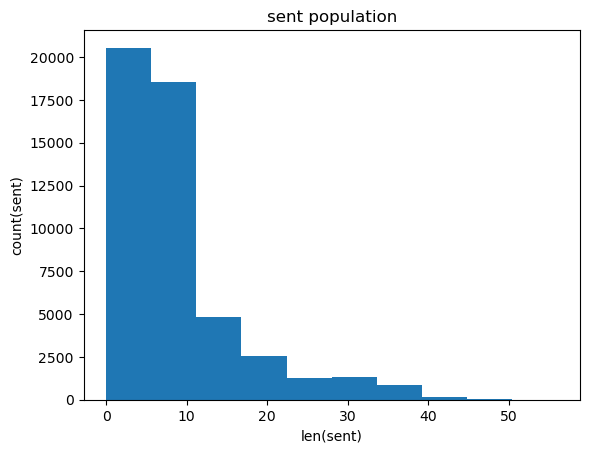

In [43]:
plt.hist(data_len, bins=10)
plt.title('sent population')
plt.xlabel('len(sent)')
plt.ylabel('count(sent)')
plt.show()

- len 15 정도로 padding

In [44]:
def padding(len_data):
    for idx, sent in enumerate(carry[0]):
        current_len = len(sent)
        if current_len < len_data:
            sent.extend([0]*(len_data - current_len))
            carry[0][idx] = sent
        else:
            sent = sent[current_len - len_data]
            carry[0][idx] = sent
    return carry

In [45]:
carry = padding(15)
carry

[[[414, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [23793, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [4, 4479, 1354, 835, 637, 693, 2271, 0, 0, 0, 0, 0, 0, 0, 0],
  [10304, 2469, 250, 51, 289, 74, 132, 0, 0, 0, 0, 0, 0, 0, 0],
  [836, 7708, 56, 16169, 836, 460, 86, 23794, 5225, 6223, 0, 0, 0, 0, 0],
  [115, 3557, 6, 115, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [577, 25, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [950, 265, 184, 23795, 16170, 22, 1756, 3081, 2215, 4213, 16171, 0, 0, 0, 0],
  16172,
  [2949,
   1589,
   301,
   12523,
   762,
   2950,
   6871,
   10305,
   114,
   12,
   12524,
   3759,
   0,
   0,
   0],
  [2152, 208, 10306, 23798, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [102, 941, 1238, 266, 508, 23799, 399, 451, 0, 0, 0, 0, 0, 0, 0],
  178,
  [140, 1055, 90, 4214, 2, 8777, 232, 10309, 1009, 0, 0, 0, 0, 0, 0],
  2,
  [12525, 974, 3240, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [485, 923, 1681, 3, 42, 5, 16177, 584, 1716, 0, 0, 

In [47]:
nsmc_test_df['padding'] = carry[0]
nsmc_test_df

,text,label,del_punct,del_stop,enco,padding
0,굳 ㅋ,1,굳 ㅋ,[굳],"[414, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[414, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,GDNTOPCLASSINTHECLUB,0,GDNTOPCLASSINTHECLUB,[GDNTOPCLASSINTHECLUB],"[23793, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[23793, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0,뭐야 이 평점들은 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,"[평점, 나쁘진, 않지만, 짜, 리, 더욱, 아니잖아]","[4, 4479, 1354, 835, 637, 693, 2271, 0, 0, 0, ...","[4, 4479, 1354, 835, 637, 693, 2271, 0, 0, 0, ..."
3,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0,지루하지는 않은데 완전 막장임 돈주고 보기에는,"[지루하지는, 않은데, 막장, 돈, 주고, 보기, 에는]","[10304, 2469, 250, 51, 289, 74, 132, 0, 0, 0, ...","[10304, 2469, 250, 51, 289, 74, 132, 0, 0, 0, ..."
4,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0,3D만 아니었어도 별 다섯 개 줬을텐데 왜 3D로 나와서 제 심기를 불편하게 하죠,"[D, 아니었어도, 별, 줬을텐데, D, 나와서, 제, 심기, 불편하게, 하죠]","[836, 7708, 56, 16169, 836, 460, 86, 23794, 52...","[836, 7708, 56, 16169, 836, 460, 86, 23794, 52..."
...,...,...,...,...,...,...
49995,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,"[오랜, 평점, 긴, 했네, 킹왕짱, 쌈뽕, 영화, 만났습니다, 강렬하게, 육, 쾌함]","[208, 4, 764, 1716, 6289, 55030, 2, 55031, 117...","[208, 4, 764, 1716, 6289, 55030, 2, 55031, 117..."
49996,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,"[의지, 박약, 이나, 하는거다, 탈영, 주인공, 김대희, 닮았고, 이등병, 찐, 따]","[3068, 55033, 76, 6140, 20947, 40, 6957, 55034...","[3068, 55033, 76, 6140, 20947, 40, 6957, 55034..."
49997,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0,그림도 좋고 완성도도 높았지만 보는 내내 불안하게 만든다,"[그림, 좋고, 완성, 도도, 높았지만, 보는, 불안하게, 만든다]","[586, 172, 687, 4559, 55036, 45, 55037, 1207, ...","[586, 172, 687, 4559, 55036, 45, 55037, 1207, ..."
49998,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0,절대 봐서는 안 될 영화 재미도 없고 기분만 잡치고 한 세트장에서 다 해먹네,"[절대, 봐, 서는, 될, 영화, 재미, 없고, 기분, 잡, 치고, 세트, 장, 해...","[263, 191, 1339, 310, 2, 20, 50, 152, 1839, 55...","[263, 191, 1339, 310, 2, 20, 50, 152, 1839, 55..."


In [48]:
nsmc_test_df.to_csv('../data/nsmc_test_df.csv', index=False, encoding='utf-8')

In [ ]:
# train_del_stopword = delete_stopword(nsmc_train_df)
# # train_del_stopword 로 적어야 했는데 오타남

# carry = []
# for text in train_del_stopword:
#     carry.append(text)

# nsmc_train_df['del_stop'] = carry
# nsmc_train_df